## Регрессионный анализ данных: методы предпосылки, методы проведения, анализ результатов.

**Регрессия** — это статистический метод, который связывает зависимую переменную с одной или несколькими независимыми переменными (строит функцию *y = a1·x1 + a2·x2 + ... + an·xn + b*, по которой можно предсказать значение зависимой переменной *y* по независимым переменным *х1, х2, ... хn*).  

[![2024-11-28-20-22-28.png](https://i.postimg.cc/vmb18PTR/2024-11-28-20-22-28.png)](https://postimg.cc/pmcVqJKk)

Основные типы регрессии:
1. Линейная регрессия - метод, связывающий зависимую переменную и независимую переменную линейной функцией. Также распространенным видом линейной регрессии является множественная регрессия, которая связывает зависимую переменную с несколькими независимыми переменными, в таком случае результат модели - линейная комбинация независимых переменных. Коэффициенты для данного метода регрессии подбираются методом наименьших квадратов.  
2. Полиномиальная регрессия - метод, связывающий зависимую и независимые переменные полиномиальной функцией, например, *y = a1·x1 + (a2)²·x2 + (a3)⁴·x3 ... an·xn + b*.  
3. Логистическая регрессия — это тип регрессии, в которой мы оцениваем наличие связи между дихотомической зависимой переменной и одной или несколькими независимыми переменными

**Предпосылки регрессии**   
Для корректной работы алгоритмов регресионных моделей необходимо следить не только за количеством наблюдений (минимум 30), отсутствием выбросов и качеством данных, но и соблюдать следующие предпосылки по теореме Гаусса-Маркова :
1. Модель линейна по параметрам и корректно специфицирована (означает, что выбрана правильная функциональная форма модели и в неё включены необходимые независимые переменные, и не включаются избыточные или нерелевантные переменные)
2. Независимые переменные являются детерминированными и линейно независимыми (независимые переменные не коррелируют и их количество не превосходит число наблюдений). Если независимые переменные коррелируют, то в данных присутсвует *мультиколлинеарность* 
3. Математическое ожидание случайных ошибок равно нулю (в данном случае случайная ошибка - это различие между наблюдаемыми и предсказанными значениями. Равенство математического ожидания нулю означает независимость ошибок между собой)
4. Дисперсия случайной ошибки одинакова для всех наблюдений (данное условие означает, что дисперсия случайной ошибки в каждом наблюдении имеет только одно значение). Условие постоянства дисперсии случайной ошибки от номера наблюдения называется гомоскедастичностью, условие непостоянства дисперсии - гетероскедастичностью  
[![2024-12-03-20-57-35.png](https://i.postimg.cc/zBvH6kFk/2024-12-03-20-57-35.png)](https://postimg.cc/5YctFLGH)
5. Случайные ошибки имеют нормальное распределение

In [1]:
import pandas as pd # Импортируем библиотеки для работы с даннми
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('house_price_regression_dataset.csv') # Загружаем датасет о стоимости недвижимости
# Подробное описание данных: https://www.kaggle.com/datasets/prokshitha/home-value-insights/data
df.head() # Проверяем загрузку датасета

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


<Axes: xlabel='Square_Footage', ylabel='House_Price'>

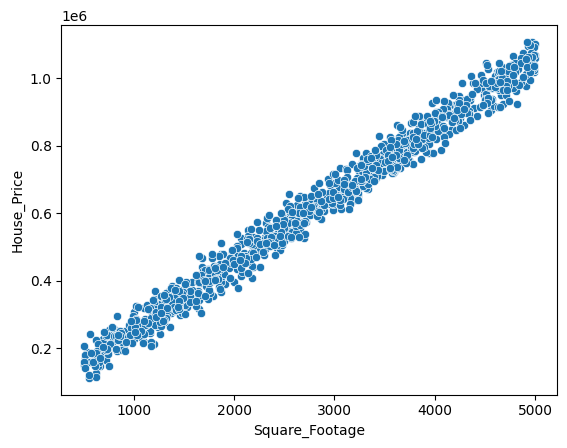

In [2]:
# Построим модель линейной регрессии, где у - стоимость дома, х - площадь
sns.scatterplot(df, x='Square_Footage', y='House_Price') # Выведем диаграмму рассеяния

In [3]:
from sklearn.linear_model import LinearRegression # Для построения линейной регресии используем метод LinearRegression
from sklearn import metrics # Импортируем метрики для оценки качества модели 
import numpy as np # Импортируем библиотеку для работы с массивами

x, y = np.array(df['Square_Footage']).reshape(-1, 1), np.array(df['House_Price']).reshape(-1, 1) # определяем независимую и зависимую переменные, метод reshape транспонирует массив
model = LinearRegression()  # Объявляем модель
model.fit(x, y)  # Обучаем модель

LinearRegression()

In [4]:
print('Коэффициент при х:', model.coef_,'Свободный коэффициент:', model.intercept_) # Выведем полученные коэффициенты

Коэффициент при х: [[200.19852991]] Свободный коэффициент: [55217.67316984]


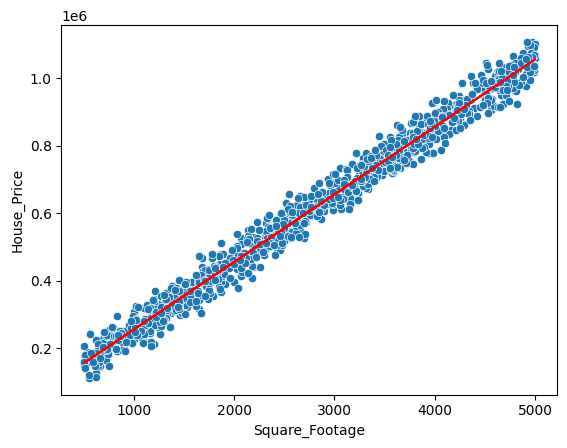

In [5]:
sns.scatterplot(df, x='Square_Footage', y='House_Price') # Отобразим на графике полученную модель
plt.plot(x, [model.intercept_[0] + model.coef_[0] * l for l in x], color='r')

In [6]:
model.predict(np.array([50, 100, 150, 100]).reshape(-1, 1)) # Также мы можем предсказать любые значения у по переменной х

array([[65227.59966536],
       [75237.52616087],
       [85247.45265638],
       [75237.52616087]])

Качество линейной регрессионной модели оценивается по следующим параметрам: 
1. R-квадрат (коэффициент детерминации). Показывает долю дисперсии зависимой переменной, объясненой с помощью регресионной модели. Он изменяется от минус бесконечности до нуля:
При R больше 0,8 говорят, что модель хорошо объясняет данные, при R больше 0,5 результат является удовлетворительным. Если значение R меньше 0,5 то модель плохая. Также есть скорректированнный коэффициент детерминации, который позволяет сравнивать модели с разным количеством переменных
2. MSE - среднеквадратичная ошибка 
3. RMSE - корень из среднеквадратичной ошибки
4. MAE - средняя абсолютная ошибка 
5. MAPE - средняя абсолютная процентная ошибка   
Пункты 2,3,4,5 - абсолютные ошибки, не позволяющие чётко оценить размеры ошибок, поэтому для оценки качества регресионной модели предпочтительнее использовать относительную метрику R-квадрат 

In [7]:
# Рассчитаем метрики качества для моделей. Для этого нам необходимо предсказать все значения у по х для расчета ошибки (|у_настоящее - у_предсказанное|)
y_predict_values = model.predict(x) # Предсказываем значения
r_square = metrics.r2_score(y, y_predict_values) # Коэффициент детерминации
mse = metrics.mean_squared_error(y, y_predict_values) ** 0.5 #MSE
mae = metrics.mean_absolute_error(y, y_predict_values) # MAE
print( 'R-квадрат:', r_square, 'MSE:', mse,'MAE:', mae)
# Значение R-квадрат = 0.88 говорит о хорошем качестве модели

R-квадрат: 0.9825992634150338 MSE: 33431.903580428225 MAE: 26996.72051668837


<Axes: >

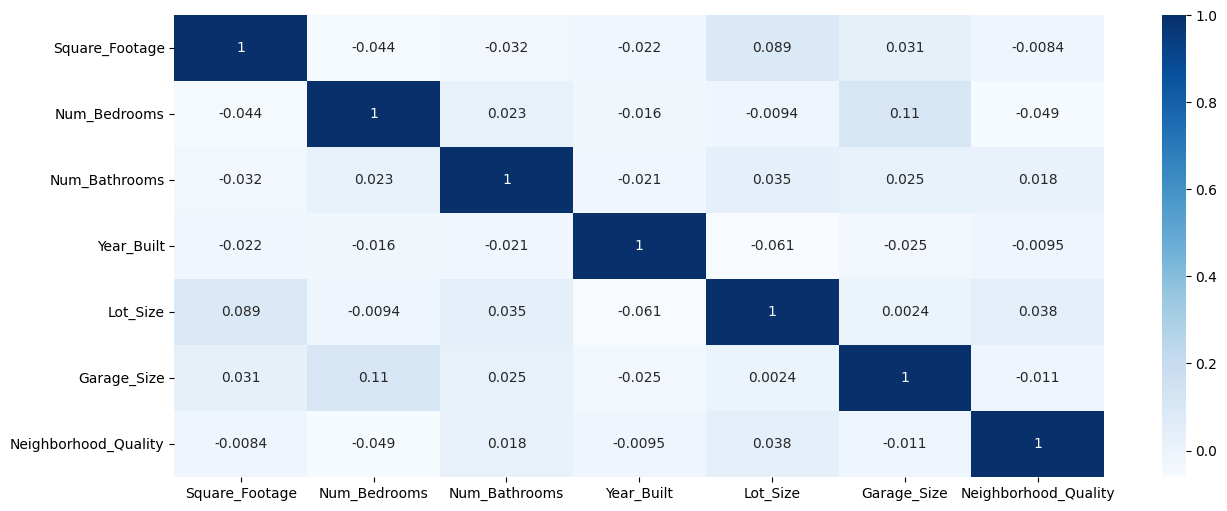

In [8]:
# Построим модель множественной линейной регресии. Для этого необходимо убедиться в отсутствии мультиколлинеарности у переменных х1, х2 ... хn
# Для определения можно отобразить матрицу корреляции или расчитывать метрику VIF
plt.figure(figsize=(15, 6))
sns.heatmap(df[[ 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',  'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']].corr(), annot=True, cmap="Blues")
# По графику убеждаемся в отсутствии мультиколлинеарности

In [9]:
# Процесс аналогичен построению обычной линейной регрессии, но теперь в х набор данных из нескольких столбцов
x, y =  np.array(df[[ 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',  'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]), np.array(df['House_Price']).reshape(-1, 1)
model = LinearRegression()  # Объявляем модель
model.fit(x,y) # Обучаем модель

LinearRegression()

In [10]:
model.coef_ # Выводим полученные коэффициенты
# Коэффициенты показывают силу и характер влияния независимых переменных на зависимую и характеризуют степень значимости отдельных переменных

array([[  199.75641134, 10170.95455485,  8244.53504682,   991.46815331,
        14919.32317901,  5158.06375911,    80.61739971]])

In [11]:
# Исследуем качество модели
y_predict_values = model.predict(x)
r_square = metrics.r2_score(y, y_predict_values)
mse = metrics.mean_squared_error(y, y_predict_values) ** 0.5
mae = metrics.mean_absolute_error(y, y_predict_values) 
print( 'R-квадрат:', r_square, 'MSE:', mse,'MAE:', mae)
# R-квадрат близок к единице, следовательно модель хорошо описывает поведение у

R-квадрат: 0.9985171191457451 MSE: 9759.564042435331 MAE: 7740.4300892328665


**Логистическая регрессия**  
Предсказывает переменную в интервале [0,1] при любых значениях независимых переменных (из-за логит преобразования) и рассчитывается значение вероятности (вероятность того что у = 1 при определённом значении х). Основная идея логистической регресии заключается не в описании данных при помощи модели, а их разделения.  
[![Снимок экрана 2024-12-05 в 21.02.00.png](https://s.iimg.su/s/05/0kcp13d6SD2b35PCgGqhPMLEeSS95VFUEO8YPZi6.png)](https://iimg.su/i/7y6fg)

In [12]:
# Для построения логистической регресии создадим дихотомическую переменную по стоимости жилья: 1- дорогое жилье, 0 - не дорогое, разделение будем проводить при помощи медианы
df['Expensive'] = 0
df.loc[df['House_Price']>df['House_Price'].median(), "Expensive"] = 1

In [13]:
from sklearn.linear_model import LogisticRegression # Импортируем логистическую регрессию
x, y = np.array(df['Square_Footage']).reshape(-1, 1), np.array(df['Expensive']).reshape(-1, 1) # Определяем переменные
model = LogisticRegression() # Объявляем модель
model.fit(x, y) # Обучаем модель

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
model.intercept_, model.coef_ # Выводим коэффициенты полученной модели 

(array([-28.8287026]), array([[0.01007734]]))

Качество логистической регрессии оценивается при помощи метрики accuracy, матрицы ошибок и визуализации

In [15]:
# Рассчитаем accuracy
y_predict_values = model.predict(x)
probs = model.predict_proba(x)
metrics.accuracy_score(y, y_predict_values)

0.971

In [16]:
# Построим матрицу ошибок
pd.DataFrame(metrics.confusion_matrix(y, y_predict_values),
             columns = ['Forecast 0', 'Forecast 1'],
             index = ['Actual 0', 'Actual 1'])
# По матрице ошибок видим, что алгоритм ошибся 29 раз из 1000: 15 раз он посчитал, что наблюдение относится к классу 1, хотя на самом деле это был класс 0, и 14 раз, наоборот, неверно отнес класс 1 к классу 0.

,Forecast 0,Forecast 1
Actual 0,485,15
Actual 1,14,486


### Задание  
Построить 3 модели множественной линейной регресии: по всем числовым признакам, с исключением самого незначительного фактора (самый минимальный коэффициент при переменной хi), с исключением 3-х незначительных факторов. Переменная У выбирается самостоятельно. Сравнить коэффициенты детерминации полученных моделей, сделать выводы о влиянии отдельных переменных на результат регрессии. Данные: https://www.kaggle.com/datasets/abrambeyer/openintro-possum